# **SFT 210: Course Project** 
---
## **Exploration and Data Preparation**  
Study Case        : Marketing Spending Prediction  
Material Lecturer : Denny Sihombing
* Name : Teresa Kaena Dharmanyoto  
* NIM  : 202304560014

---
### **Chosen Dataset**
Dataset Title : **Marketing Campaign**  
Source Link   : https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data  

### **Dataset Description**
This dataset contains customer demographic and behavioral data collected to improve marketing campaign effectiveness. The `original` goal was to predict customer response to promotional offers based on variables like household composition, enrollment date, and recency of purchases.

### **The Context, Current Goal, and Target Variable**
In this project, we have redefined the objective by simplifying the dataset and focusing on modeling Spending, a custom feature that aggregates the total amount spent across all product categories. The aim is to predict customer spending behavior using features such as income, age, recency (days since last purchase), education level, relationship status, and child status. By doing so, businesses can identify high-value customers, allocate marketing resources more effectively, and personalize strategies to maximize return on investment. This setup transforms the problem into a supervised regression task with Spending as the continuous target variable.

---

##  **Section 1: Data Understanding**

1. **Load the Dataset**

   Here, we can verify and examine the **base structure** of our dataset. We loaded its Head (first 5 rows) and Tail (last 5 rows) first as a reference. From this we can also learn the **total number** of **records** and **features**, alongside any suspicious or unusual collumns.

In [90]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("marketing_campaign.csv", delimiter=';') 
print("First 5 rows:")
print(df.head())

print("Last 5 rows:")
print(df.tail())

print("Dataset shape (rows, columns):", df.shape)


First 5 rows:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0

> We learned that we have a total of **2240 rows and 29 columns**.

2. **Initial Inspection**
   
   df.info and df.dtypes helps us understand the data types, non-null counts, and overall structure. We can identify the columns with missing values or incorrect types (eg. dates being marked as objects).

In [91]:
# Show the total amount of rows and collumns in the dataset
print("\nDataset Size (row, collumn):", df.shape)

df.info()
## Show each column's names
print("Column names:", df.columns.tolist())

## Show each column's data types
print("Data types:")
print(df.dtypes)



Dataset Size (row, collumn): (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 1

> We learned that:
> - `Income` column had missing (null) values,
> - All other columns were non-null,
> - `Dt_Customer` was an object (string), when it could've been datetime -- we decided to ignore this, since its irrelevant to our target.

3. **Descriptive Statistics**   
   To show descriptive statistics for our data; quantify the tendencies, spread, and category counts, we're going to use df.describe.

In [92]:
## Display Descriptive Statistics for both numeric and categorical columns
print("Numeric columns:")
print(df.describe())

print("\nCategorical columns:")
print(df.describe(include='object'))


Numeric columns:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.0000

> We learned that:
> - There were **26 Numeric Columns, and 3 Categorical Columns**,
> - Variables like `MntWines` and `MntMeatProducts` show **right-skewed distributions**.
> - `Year_Birth` ranges from 1893 to 1996; some extreme values may be **outliers** or data errors.
> - Some categorical variables (e.g., `Marital_Status`) contain **many unique values**, possibly including **redundant or inconsistent categories**.

4. **Missing and Duplicated Values**  
   Next we're going to check for missing and/or duplicated values with df.isnull and df.duplicated.

In [93]:
##  Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print("Missing values:")
print(missing[missing > 0])
print("Percentage:")
print(missing_percent[missing_percent > 0])

## Check for duplicated values
print("Duplicate rows:", df.duplicated().sum())


Missing values:
Income    24
dtype: int64
Percentage:
Income    1.071429
dtype: float64
Duplicate rows: 0


> We learned that:
> - `Income` was the only column with missing values, **24 rows**,
> - There were no duplicate values.

5. **Exploratory Visualizations (EDA)**  
   - **Histograms** to display the numeric features (df.hist),
   - **Countplots** for the categorical features,
   - A mix of **boxplots and countplots** to display feature-target relationships.

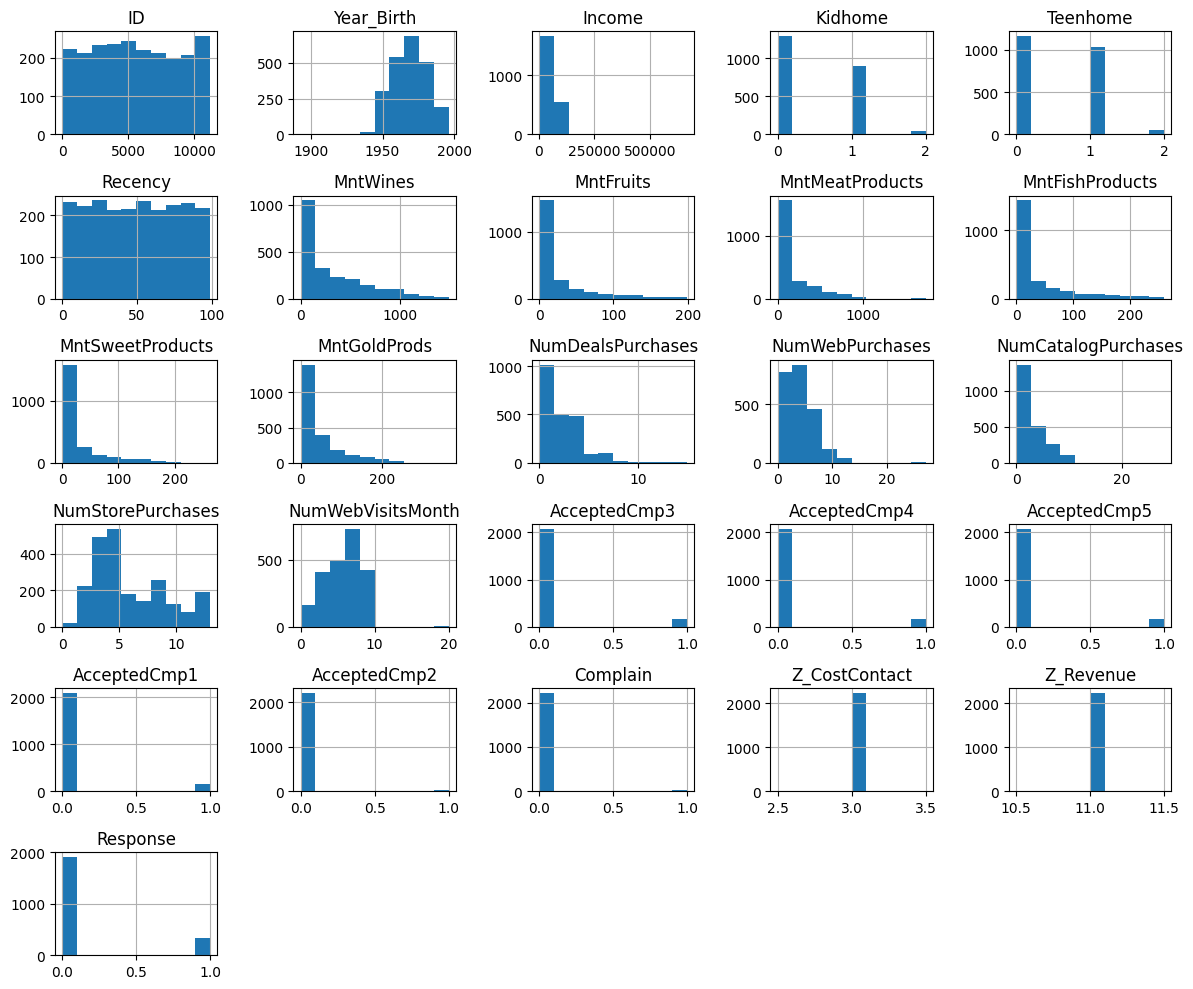

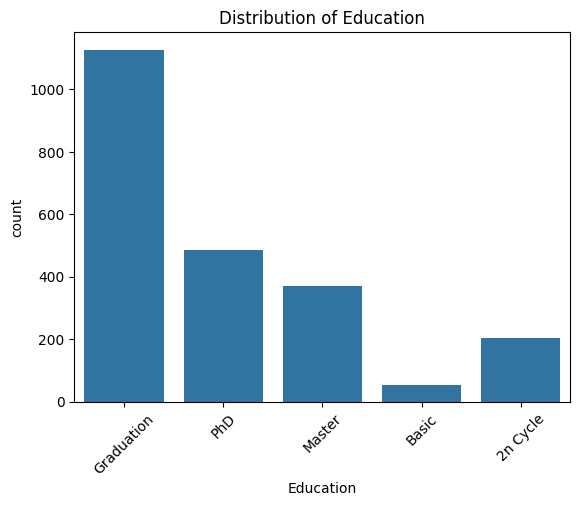

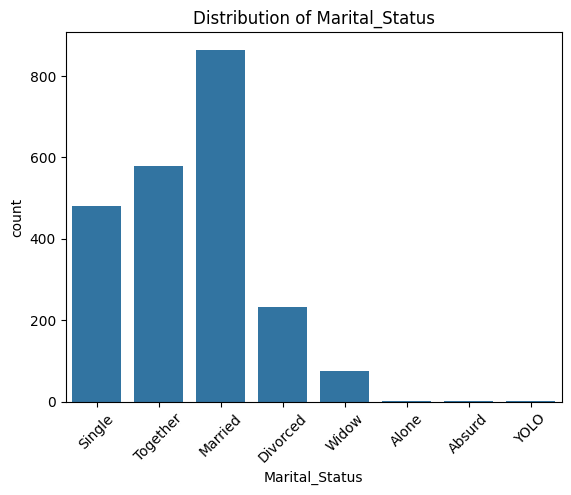

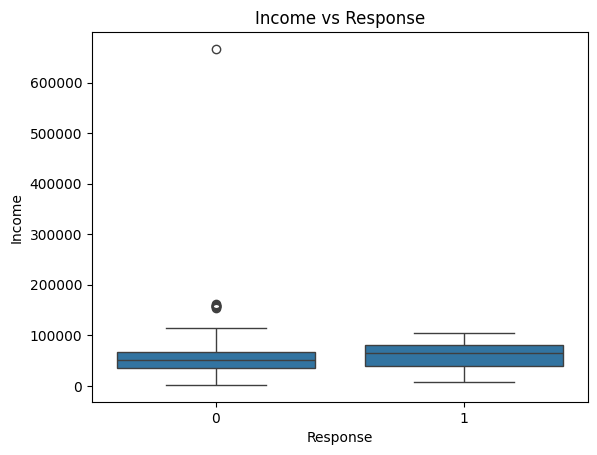

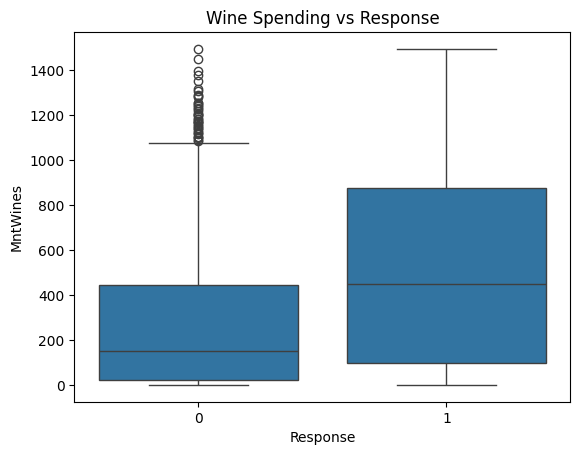

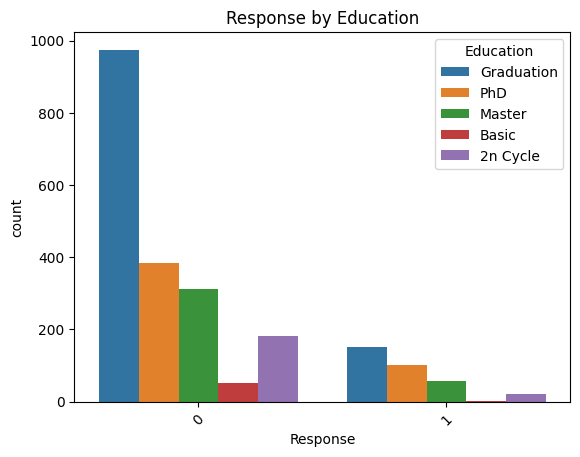

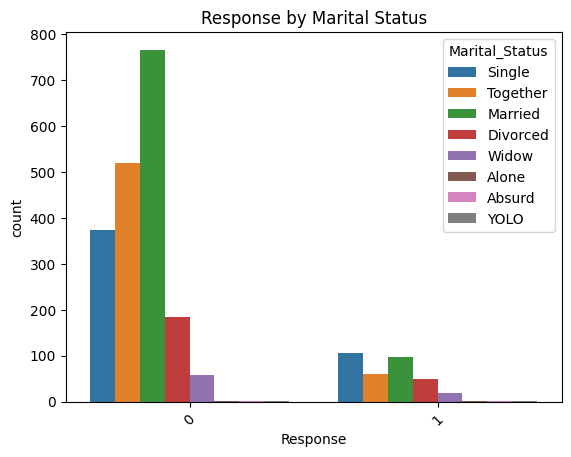

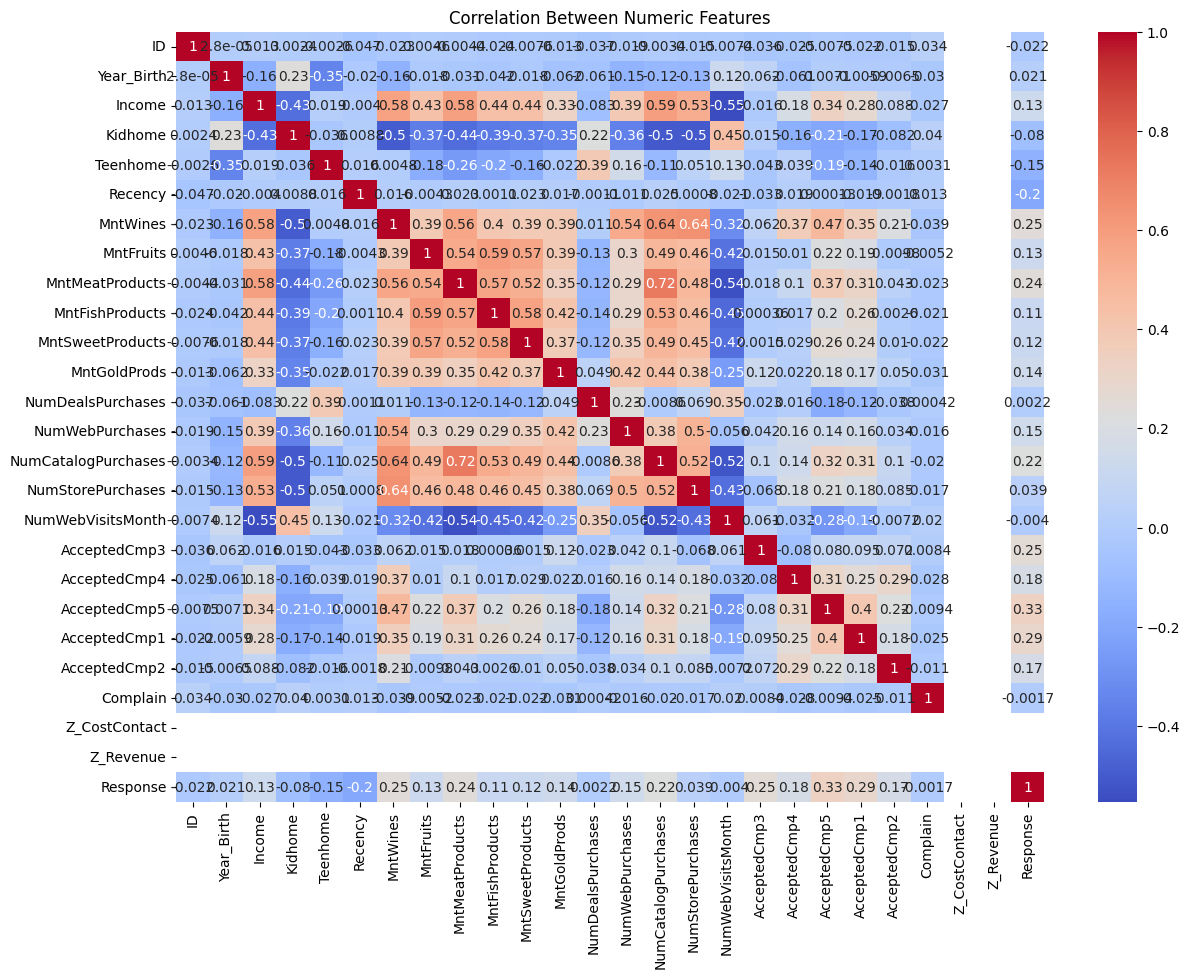

In [94]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

for column in ['Education', 'Marital_Status']:  
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column}")
    plt.show()

# Relation between numeric features and the target
sns.boxplot(x='Response', y='Income', data=df)
plt.title("Income vs Response")
plt.show()

sns.boxplot(x='Response', y='MntWines', data=df)
plt.title("Wine Spending vs Response")
plt.show()


# Relation between categorical features and the target
sns.countplot(x='Response', hue='Education', data=df)
plt.title("Response by Education")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Response', hue='Marital_Status', data=df)
plt.title("Response by Marital Status")
plt.xticks(rotation=45)
plt.show()

## Heatmap of numeric feature correlation
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

> From the histograms of the numeric features, we learned that:
> - `Year_birth` skewed towards recent years, most customers were born from around 1950-1995,
> - `Income` had a strong right skew, showing few customers earn very high amounts,
> - Most spending features were right-skewed, indicating that many customers spend very little in certain categories,
> - `Recency` shows a relatively uniform distribution — customers were last contacted accross the full range (0-100 days).

> From the countplots of the categorical features, we learned that:
> - Categories like `Marital_Status` had many labels, when optimally, some could be merged (eg. they're either "Single" or "Together"),
> - Education levels are fairly balanced, but most customers are Graduates.

> From the feature-target relationships we learned that:
> - Customers with higher income and higher wine spending are more likely to respond to campaigns,
> - Graduates and Singles appear slightly more responsive than other groups — could be targeted better in marketing.

> From the heatmap of numeric feature correlations, we learned that:
> - Strong positive correlations between spending features may reflect high-income behavior. (e.g., wine, meat, gold)
> - `Recency` has negative correlation with most spendings, suggesting recent contacts are more likely low spenders.

---
## **Section 2: Data Preparation**
> Feature Engineering, Cleaning, and Selection

Here, we're going to simplify and clean our dataset to make it easier to analyze and model. We selected **7 key features** to focus on: Age, Income, Spending, simplified Marital_Status, Has_Child, and a quantitative education metric.  

Since some of these were not explicitly provided in the dataset, we'll generate them using Feature Engineering techniques.

1. **Selecting Relevant Columns and Drop Nulls**  
   We'll begin by extracting the raw columns needed for our derived features, and removing rows with any missing values to avoid errors later.

In [95]:
# Select and clean relevant columns
selected_columns = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'Marital_Status', 'Kidhome', 'Teenhome', 'Education']

df_selected = df[selected_columns].dropna()

# Show shape and first few rows
print("Current dataset shape:", df_selected.shape)
print(df_selected.head())

Current dataset shape: (2216, 12)
   Year_Birth   Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0        1957  58138.0       635         88              546              172   
1        1954  46344.0        11          1                6                2   
2        1965  71613.0       426         49              127              111   
3        1984  26646.0        11          4               20               10   
4        1981  58293.0       173         43              118               46   

   MntSweetProducts  MntGoldProds Marital_Status  Kidhome  Teenhome  \
0                88            88         Single        0         0   
1                 1             6         Single        1         1   
2                21            42       Together        0         0   
3                 3             5       Together        1         0   
4                27            15        Married        1         0   

    Education  
0  Graduation  
1  Graduation  
2  G

> We ended up with **2216 rows and 12 collumns.**

2. **Convert `Year_Birth` into `Age`**  
   We'll calculate the `Age` from `Year_Birth`, then remove rows with unrealistic values (e.g., too young or too old). For this dataset, let's keep ages between 18 and 90.

In [96]:
# Convert to Age
df_selected['Age'] = 2024 - df_selected['Year_Birth']

# Remove age outliers: keep only ages between 18 and 90
df_selected = df_selected[(df_selected['Age'] >= 18) & (df_selected['Age'] <= 90)]

# Drop the original Year_Birth column
df_selected = df_selected.drop(columns=['Year_Birth'])

# Display result
print("Age range after filtering:", df_selected['Age'].min(), "-", df_selected['Age'].max())
print(df_selected[['Age']].head())
print("Current dataset shape:", df_selected.shape)
print(df_selected.head())


Age range after filtering: 28 - 84
   Age
0   67
1   70
2   59
3   40
4   43
Current dataset shape: (2213, 12)
    Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       635         88              546              172   
1  46344.0        11          1                6                2   
2  71613.0       426         49              127              111   
3  26646.0        11          4               20               10   
4  58293.0       173         43              118               46   

   MntSweetProducts  MntGoldProds Marital_Status  Kidhome  Teenhome  \
0                88            88         Single        0         0   
1                 1             6         Single        1         1   
2                21            42       Together        0         0   
3                 3             5       Together        1         0   
4                27            15        Married        1         0   

    Education  Age  
0  Graduation   67  
1  Gr

> - We replaced `Year_Birth` with `Age` and removed the unrealistic values,
> - The age range of our customers are 28-84 years old,
> - We're left with **2213 rows** and 12 columns.    

3. Remove `Income` Outliers

In [97]:
# Calculate the 99th percentile
income_cap = df_selected['Income'].quantile(0.99)

# Filter out high income outliers
df_selected = df_selected[df_selected['Income'] <= income_cap]

# Display result
print("Income cap (99th percentile):", income_cap)
print("Income range after filtering:", df_selected['Income'].min(), "-", df_selected['Income'].max())
print("Current dataset shape:", df_selected.shape)
print(df_selected.head())


Income cap (99th percentile): 94461.44
Income range after filtering: 1730.0 - 94384.0
Current dataset shape: (2190, 12)
    Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       635         88              546              172   
1  46344.0        11          1                6                2   
2  71613.0       426         49              127              111   
3  26646.0        11          4               20               10   
4  58293.0       173         43              118               46   

   MntSweetProducts  MntGoldProds Marital_Status  Kidhome  Teenhome  \
0                88            88         Single        0         0   
1                 1             6         Single        1         1   
2                21            42       Together        0         0   
3                 3             5       Together        1         0   
4                27            15        Married        1         0   

    Education  Age  
0  Graduation   6

> - The `Income` range after filtering is `$1,730 - $94,384` across **2190 rows** and  12 columns.
> - By removing the top 1%, we can reduce the  skewness without losing too much data.

4. **Create total `Spending` Feature**  
   To get a bigger picture of our customers, we added a column to see the total spendings of each one. 

In [98]:
## Find Total Spending
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_selected['Spending'] = df_selected[spending_features].sum(axis=1)

# Drop the individual Mnt columns (already aggregated into 'Spending')
columns_to_drop = spending_features  # Only these specific columns
df_selected = df_selected.drop(columns=columns_to_drop)

print("Spending summary:")
print(df_selected['Spending'].describe())
print(df_selected[['Spending']].head())
print("Current dataset shape:", df_selected.shape)
print(df_selected.head())


Spending summary:
count    2190.000000
mean      600.626941
std       597.434840
min         5.000000
25%        69.000000
50%       394.000000
75%      1034.000000
max      2525.000000
Name: Spending, dtype: float64
   Spending
0      1617
1        27
2       776
3        53
4       422
Current dataset shape: (2190, 7)
    Income Marital_Status  Kidhome  Teenhome   Education  Age  Spending
0  58138.0         Single        0         0  Graduation   67      1617
1  46344.0         Single        1         1  Graduation   70        27
2  71613.0       Together        0         0  Graduation   59       776
3  26646.0       Together        1         0  Graduation   40        53
4  58293.0        Married        1         0         PhD   43       422


> - The total `Spending` feature combines 6 categories, showing a range of `$5 to $2,525` spent on products, with a mean spending of around $600.
> - Since we dropped the individual spendings columns, we're left with 2190 rows and **7 columns**.  

5. **Simplify `Marital_Status` Categories**  
   Previously we noted that Marital_Status had a few redundant labels, so we'll turn them into a binary relationship flag -- "In  Couple"  or "Alone". Since there's only 2 categories, we'll use `.map()` to  flag them as binary numerics, as it is the simplest and suitable encoding method for this situation. 

In [99]:
# Define mapping to broader categories
couple_status = ['Married', 'Together']
df_selected['Relationship_Status'] = df_selected['Marital_Status'].apply(
    lambda x: 'In Couple' if x in couple_status else 'Alone'
)

# Drop the original Marital_Status column
df_selected = df_selected.drop(columns=['Marital_Status'])

#Label Encoding
df_selected['Relationship_Status'] = df_selected['Relationship_Status'].map({'In Couple': 1, 'Alone': 0})

# Display result
print("Relationship Status value counts:")
print(df_selected['Relationship_Status'].value_counts())
print("Current shape:", df_selected.shape)
print(df_selected.head())

Relationship Status value counts:
Relationship_Status
1    1416
0     774
Name: count, dtype: int64
Current shape: (2190, 7)
    Income  Kidhome  Teenhome   Education  Age  Spending  Relationship_Status
0  58138.0        0         0  Graduation   67      1617                    0
1  46344.0        1         1  Graduation   70        27                    0
2  71613.0        0         0  Graduation   59       776                    1
3  26646.0        1         0  Graduation   40        53                    1
4  58293.0        1         0         PhD   43       422                    1


> - There are 1416 customers who are in a relationship (couple) and 774 who are not (alone),
> - More customers fall into the "In Couple" group.
> - Since we did not replace or drop any columns, we're still at 2190 rows and 7 columns.   


6. **Encode `Has_Child` Column**  
   We'll merge the columns `Kidhome` and `Teenhome` into a binary column that reads whether or not a customer "Has (a) Child". Mapping the "Yes" and "No" into 1 and 0s is simple, intuitive, and avoids overengineering.

In [100]:
# Create binary indicator
df_selected['Has_Child'] = df_selected[['Kidhome', 'Teenhome']].sum(axis=1).apply(
    lambda x: 'Yes' if x > 0 else 'No'
)

# Drop original columns
df_selected = df_selected.drop(columns=['Kidhome', 'Teenhome'])

# Encode: Yes = 1, No = 0
df_selected['Has_Child'] = df_selected['Has_Child'].map({'Yes': 1, 'No': 0})

# Display results
print("Encoded Has_Child:")
print(df_selected['Has_Child'].value_counts())
print("Current shape:", df_selected.shape)
print("-" * 50)
print(df_selected.head())

Encoded Has_Child:
Has_Child
1    1575
0     615
Name: count, dtype: int64
Current shape: (2190, 6)
--------------------------------------------------
    Income   Education  Age  Spending  Relationship_Status  Has_Child
0  58138.0  Graduation   67      1617                    0          0
1  46344.0  Graduation   70        27                    0          1
2  71613.0  Graduation   59       776                    1          0
3  26646.0  Graduation   40        53                    1          1
4  58293.0         PhD   43       422                    1          1


> - More customers had children compared to those who did not,
> - 1575 customers had children, while 615 did not.
> - Since we removed 2 and replaced it with 1 new one, we're left at 2190 rows and **6 columns**.     

7. **Convert `Education` into  Numeric (Years)**  
   Similar to Step 5 and 6, we'll simplify the `Education` column into one that reads `Education_Years`. The numeric column was **converted logically** to read the estimated number of years one spent in education, rather than various arbitrary category labels.

In [101]:
# Map education levels to estimated years
education_years_map = {
    'Basic': 9,
    '2n Cycle': 12,
    'Graduation': 16,
    'Master': 18,
    'PhD': 21
}
df_selected['Education_Years'] = df_selected['Education'].map(education_years_map)

# Drop original column
df_selected = df_selected.drop(columns=['Education'])

# Display results
print("Mapped Education to Years:")
print(df_selected['Education_Years'].value_counts().sort_index())
print("Current shape:", df_selected.shape)
print("-" * 50)


Mapped Education to Years:
Education_Years
9       54
12     197
16    1105
18     362
21     472
Name: count, dtype: int64
Current shape: (2190, 6)
--------------------------------------------------


> - The most common level of education is **16  years**, or previously noted as "Graduation"
> - Since we did not replace or drop any columns, we're still at 2190 rows and 6 columns.   

In [102]:
## Final Look
print("Final dataset shape:", df_selected.shape)
print("Preview of final dataset:")
print(df_selected.head())

Final dataset shape: (2190, 6)
Preview of final dataset:
    Income  Age  Spending  Relationship_Status  Has_Child  Education_Years
0  58138.0   67      1617                    0          0               16
1  46344.0   70        27                    0          1               16
2  71613.0   59       776                    1          0               16
3  26646.0   40        53                    1          1               16
4  58293.0   43       422                    1          1               21


> At the end of our Data Preparation, we're left with a clean dataset of 2190 rows and 6 columns.

We cleared out the rows with null values, outliers, and avoided skewing risks. We also used **Binary Encoding and Data Transformatiom** to simplify categorical values, giving the model a more meaningful and ordinal input feature, which is better than label encoding arbitrary category names.  

Since the data and desired output is pretty simple, this approach is a streamlined and efficient way to handle the situation where you need a binary flag (eg. yes/no), and it avoids the unnecessary complexity of more general encoding techniques like LabelEncoder or OneHotEncoder.  

In summary, we were able to: 
- Keep the number of columns small (in-line with our target),
- Turn all variables into a numeric format, suitable for most machine learning models (e.g., logistic regression, decision trees, and 
- Ensure encoding suitability. Because the encoded features are binary or ordinal (Education_Years), .map() is the most compact and interpretable choice. One-hot encoding would unnecessarily expand the dataset without added benefit.

## **Feature Scaling**  
First we identified the following numeric features to be scaled: Income, Age, Education_Years, as these features vary widely in scale (e.g., Income can be in the thousands, Age is in decades), which could bias the model if left unscaled.

We used the StandardScaler method rather than MinMax, since it transforms features to have a mean of 0 and standard deviation of 1. It works better for models sensitive to feature magnitude — such as KNN, logistic regression, SVM, and PCA. Unlike MinMaxScaler, it preserves the shape of the original distribution and handles outliers better.

## **Train-Test Split**
We split the data into `80:20`, as its a common practice — providing enough data for both training and evaluation. `random_state=42` is used ensure reproducibility, as you get the same split every time, whihle `stratify=y` preserves the class distribution in both training and test sets — its important for classification tasks.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 2. Define features (X) and target (y)
target_column = 'Spending'
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# 3. Train-test split (80-20), no stratify since target is continuous
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Identify columns to scale (numerical only)
numerical_cols_to_scale = ['Income', 'Age', 'Education_Years']
scaler = StandardScaler()

# 5. Fit on training set only, transform both sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# 6. Verification
print("\n--- Head of Scaled Training Data ---")
print(X_train_scaled.head())

print("\n--- Scaled Feature Summary (Training Set) ---")
print(X_train_scaled[numerical_cols_to_scale].describe().T)

# 7. Show split dimensions
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



--- Head of Scaled Training Data ---
        Income  Recency       Age  Relationship_Status  Has_Child  \
175   1.412039       56 -0.530977                    1          1   
1909 -0.981953       95 -0.958452                    1          1   
1399 -0.026941       11 -0.018007                    1          1   
574  -0.716367       56 -1.043947                    1          1   
990   1.669398        6  1.264419                    0          0   

      Education_Years  
175          1.449119  
1909         0.388168  
1399         1.449119  
574          0.388168  
990         -0.319133  

--- Scaled Feature Summary (Training Set) ---
                  count          mean       std       min       25%       50%  \
Income           1752.0  6.488975e-17  1.000286 -2.441351 -0.802912 -0.004442   
Age              1752.0  1.987249e-16  1.000286 -2.326373 -0.701967 -0.103502   
Education_Years  1752.0  2.382670e-16  1.000286 -2.794686 -0.319133 -0.319133   

                      75%      

### Feature Scaling
- The features now have a **mean ~0 and std ~1**  
- Values are properly centered and standardized without extreme distortion

### Data Split
- The training set (X_train) had **1,752 samples**; the test set (X_test) had **438 samples**  
- The target variable (`Spending`) was split along with inputs to enable model evaluation  
- `StandardScaler` was fit **only on the training data** and applied to both sets to prevent data leakage

### Target and Modeling Goal
The goal is to **predict customer Spending** based on demographic and behavioral features — a **regression task** if Spending is treated as continuous.  

Feature scaling ensures all numerical inputs contribute equally, preventing bias from scale differences. The train-test split helps avoid overfitting and allows objective evaluation of model performance.  

---

## Section 3: Summary

### Summary of Findings (Data Understanding)   
We've adjusted this marketing campaign dataset to focus on consumer behavior, demographics, and spending patterns. The newly designed `Spending` feature, summing up all individual purchase categories, captures overall consumer value, while important characteristics like `Income`, `Age`, and `Education_Years` offer insight into purchasing capability and timing. We can better identify client groupings and get ready for prediction or segmentation models based on spending behavior thanks to this integrated perspective.

### Summary of Preparations (Data Preparation)  
In this stage, we cleaned up, encoded, and merged the corresponding data to better understand and analyze them. This was done to get it to  an optimal state with the least amount of redundant components possible, according to our target. To make sure the numerical characteristics—Income, Recency, Age, and Education_Years—contributed equally to any model, we scaled them using `StandardScaler`. We also chose important features, such as binary and numerical variables.  After that, the dataset was divided into training and test sets in an `80:20 ratio`. To preserve the class distribution, `stratify` was employed.  Six features from the train and test sets are evenly distributed and clean in the final data structure, making it fit for modeling.

### Reflection and Challenges
After constructing the aggregated Spending column, one of the main challenges was determining which features were unnecessary and making sure the model didn't leak any information. By carefully examining feature significance and removing unnecessary ones, this was fixed.  

Selecting the appropriate scaling method presented another difficulty; we defended the use of StandardScaler by pointing to its compatibility with planned algorithms and resilience to outliers.  

Last but not least, careful consideration of the stratify parameter was necessary to provide appropriate train-test separation without warping desired class proportions.  

> But all in all, together, these actions helped provide a strong basis for insightful segmentation or predictive modeling.